In [3]:
import cv2
import numpy as np
from numpy import ones
from matplotlib import pyplot as plt

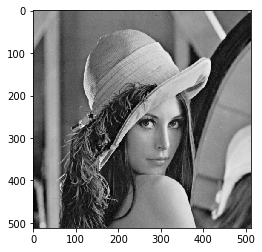

In [4]:
# load image
image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE).astype(float)/ 255.0
plt.imshow(image, cmap='gray')

## Box Filter

In [5]:
# Kernal of all ones is a box blur, averagin all neighbors
#kernel = (np.array([[1, 1, 1],
#                    [1, 1, 1],
#                    [1, 1, 1]]))

def createBoxFilter(n):
    # Create box filter of size n*n
    return ones([n, n])

def implementFilter(image, n):
    kernel = gaussianFilter(n)
    
    # weighted pixels have to be in range 0...1 so divide by the sum of all kernals
    kernelSum = kernel.sum()

    # fetching dimensions for iteration
    imageWidth = image.shape[0]
    imageHeight = image.shape[1]
    kernelWidth = kernel.shape[0]
    kernelHeight = kernel.shape[1]

    filteredImage = np.zeros_like(image)

    # Iterate over each pixel
    for h in range(imageHeight):
        for w in range(imageWidth):
            weightedPixel = 0
        
            # Iterate over each weight(kw, kh) in the kernal for image[y, x]
            for kh in range(int(-(kernelHeight / 2)), kernelHeight - 1):
                for kw in range(int(-(kernelWidth / 2)), kernelWidth - 1):
                    pixel = 0
                    pixelH = h - kh
                    pixelW = w - kw
                
                    # border value check / padding if needed (zero padding)
                    if (pixelH >= 0) and (pixelH < imageHeight) and (pixelW >= 0) and (pixelW < imageWidth):
                        pixel = image[pixelH, pixelW]
                    
                    weight = kernel[int(kh + (kernelHeight) / 2), int(kw + (kernelWidth / 2))]
                    weightedPixel += pixel * weight
                
            filteredImage[h, w] = weightedPixel / kernelSum

    plt.imshow(filteredImage, cmap='gray')

#implementFilter(image, 3)

In [6]:
def gaussianFilter(sigma):
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    return gaussian_filter

In [7]:
implementFilter(image, 4)

IndexError: index 33 is out of bounds for axis 1 with size 33

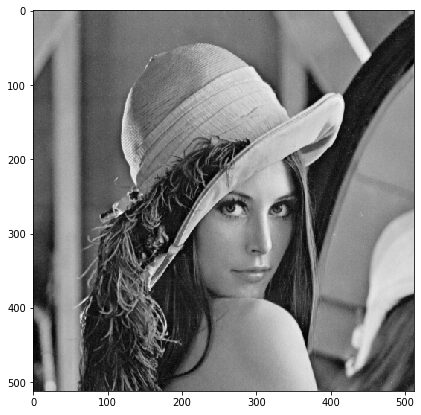

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from scipy import signal
import math

# Read the image and be sure it is grayscale
im_path = 'lena.png'
im = io.imread(im_path)
im = rgb2gray(im)

# Ensure the image is a float in the range [0-1]
im = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) *1.0)).astype('float')

# Show the image
fig1 = plt.figure(figsize = (7,7))
plt.imshow(im, cmap='gray')

In [9]:
# Create an nxn filter of the function: f(x,y) = a*sin(x) + b*cos(y)
def create_filter(n):
    
    # Make sure the filter is an odd size
    if (n%2 == 0):
        n += 1
        
    # Create a blank filter nxn
    filter_out = np.ones((n,n))
 
    # If you want integer sampling use
    x_sampling = np.linspace(-(n-1)/2, (n-1)/2, n)
    y_sampling = np.linspace(-(n-1)/2, (n-1)/2, n)
    
    #print(x_sampling)
    #print(y_sampling)
    #print(filter_out[0])
    # Fill in the filter
    for x in range(0, len(x_sampling)):
        print(filter_out[x]*x_sampling[x])
        #for y in range(0, len(y_sampling)):
            
            # Sample the function at our precomputed sampling locations
      #      filter_out[x,y] = a*math.sin(x_sampling[x]) + b*math.cos(y_sampling[y])
            
    # Normalize the filter (sum to 1)
    #filter_out = filter_out / np.sum(filter_out.flatten())
    
    #return filter_out
    
create_filter(3)

[-1. -1. -1.]
[0. 0. 0.]
[1. 1. 1.]


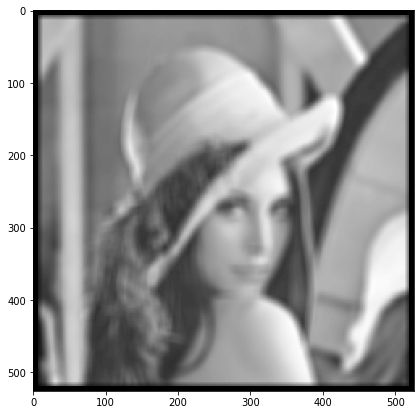

In [37]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from scipy import signal
import math

def boxFilter(n):
    
    if n%2 == 0:
        n += 1
    
    img_path = 'lena.png'
    img = io.imread(img_path)
    img = rgb2gray(img)
    
    img = np.pad(img, pad_width = int(n/2), mode='constant', constant_values = 0)
    img_out = img.copy()
    
    height = img.shape[0]
    width = img.shape[1]

    for i in np.arange(int(n/2), height-int(n/2)):
        for j in np.arange(int(n/2), width-int(n/2)):        
            sum = 0
            for k in np.arange(-(int(n/2)), int(n/2)):
                for l in np.arange(-(int(n/2)), int(n/2)):
                    a = img.item(i+k, j+l)
                    sum = sum + a
            b = float(sum / (n * n))
            img_out.itemset((i,j), b)
    
    fig1 = plt.figure(figsize = (7,7))
    plt.imshow(img_out, cmap='gray')
    
boxFilter(15)

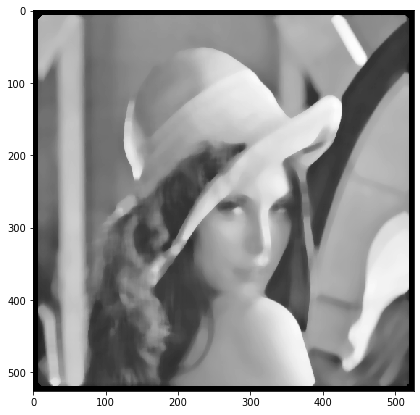

In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from scipy import signal
import math

def medianFilter(img, n):
    
    if n%2 == 0:
        n += 1
    
    img = np.pad(img, pad_width = int(n/2), mode='constant', constant_values = 0)
    img_out = img.copy()
    
    height = img.shape[0]
    width = img.shape[1]
    index = int(((n*n) + 1)/2 - 1)

    for i in np.arange(int(n/2), height-int(n/2)):
        for j in np.arange(int(n/2), width-int(n/2)):        
            neighbours = []
            for k in np.arange(-(int(n/2)), int(n/2)):
                for l in np.arange(-(int(n/2)), int(n/2)):
                    a = img.item(i+k, j+l)
                    neighbours.append(a)
            neighbours.sort()
            median = neighbours[index]
            b = median
            img_out.itemset((i,j), b)
    
    fig1 = plt.figure(figsize = (7,7))
    plt.imshow(img_out, cmap='gray')
  
img_path = 'lena.png'
img = io.imread(img_path)
img = rgb2gray(img)
medianFilter(img, )

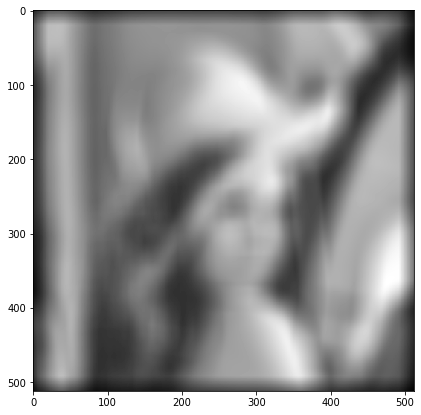

In [40]:
def convolution(image, gfilter):
    
    imageRow = image.shape[0]
    imageColumn = image.shape[1]
    gfilterRow = gfilter.shape[0]
    gfilterColumn = gfilter.shape[1]
    
    imageOut = np.zeros(image.shape)
    
    pad_height = int((gfilterRow - 1) / 2)
    pad_width = int((gfilterColumn - 1) / 2)
 
    padded_image = np.zeros((imageRow + (2 * pad_height), imageColumn + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
    
    for row in range(imageRow):
        for col in range(imageColumn):
            imageOut[row, col] = np.sum(gfilter * padded_image[row:row + gfilterRow, col:col + gfilterColumn])
    
    return imageOut

def gaussFunction(x, u, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - u) / sd, 2) / 2)

def createGaussianFilter(n, sigma = 1):
    if n%2 == 0:
        n += 1
    
    filter1D = np.linspace(-(int(n/2)), int(n/2), n)
    for i in range(n):
        filter1D[i] = gaussFunction(filter1D[i], 0, sigma)
    filter2D = np.outer(filter1D.T, filter1D.T)
    filter2D*= 1.0 / filter2D.max()
    
    return filter2D



def gaussianFilter(image, n, sigma):
    
    gaussianFilter = createGaussianFilter(n, sigma)
    filteredImage = convolution(image, gaussianFilter)
    
    fig1 = plt.figure(figsize = (7,7))
    plt.imshow(filteredImage, cmap='gray')
    
img_path = 'lena.png'
img = io.imread(img_path)
img = rgb2gray(img)
gaussianFilter(img, 40, 40)